In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer


C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
file_path = r"C:\Users\User\Desktop\corpus_100k"

with open(file_path, "r",encoding="utf-8") as file:
    content = file.read()

In [20]:
content=content[:300000]

In [21]:
content

'Հիմա ես կարող է մի բառ մի քիչ անզգույշ արտահայտեմ , եւ երեք ամիս ՀՀ ներքաղաքական կյանքն այդպես էլ չխաղաղվի . Փաշինյան\nՄենք ճիշտ քայլերով գնում ենք առաջ վեկտորի առումով ։\nԱյս մասին այսօր ՝ ապրիլի 22-ին , Երեւանի պետական համալսարանի տնտեսագիտական ֆակուլտետում դասախոսների եւ ուսանողների հետ հանդիպման ժամանակ ասաց ՀՀ վարչապետ Նիկոլ Փաշինյանը ։\n« Իհարկե , կարող ենք բազմաթիվ բացթողումներ թույլ տալ , սխալներ անել ։\nՀիմա ես կարող է մի նախադասություն մի քիչ անզգույշ արտահայտեմ , եւ դրանից երեք ամիս ՀՀ ներքաղաքական կյանքն այդպես էլ չխաղաղվի ։\nՈչ ոք չմտածի ՝ թե մարդ էր , երեւի էդ մի բառը սխալ ասեց , բայց վեկտորի առումով ես համոզված եմ , որ ճիշտ ենք գնում » , - ասաց Փաշինյանը ։\nՆա նկատեց , որ այսօր շատերը չեն հավատում իրենց ընտրած մոդելին .\n« Ես գիտեմ , որ մեր տնտեսագետների մի ստված մասը մեր ընտրած մոդելին չի հավատում , բայց ես խնդիր չունեմ , որովհետեւ ես գիտեմ , որ 2018 թվականի մարտի 31-ի դրությամբ Հայաստանի քաղաքացիների 99 տոկոսը չէր հավատում , որ հեղափոխություն է լինելու . , - ասաց Փաշի

In [22]:
content=content.split("։")

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(content)
sequences = tokenizer.texts_to_sequences(content)

def generate_training_data(sequences, window_size):
    training_data = []
    for seq in sequences:
        for i, target_word_index in enumerate(seq):
            for j in range(i - window_size, i + window_size + 1):
                if j != i and 0 <= j < len(seq):
                    context_word_index = seq[j]
                    training_data.append((context_word_index, target_word_index))
    return training_data

window_size = 2
training_data = generate_training_data(sequences, window_size)

word_index = tokenizer.word_index
index_to_word = {index: word for word, index in word_index.items()}

vocab_size = len(word_index) + 1
embedding_dim = 100 

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1))
model.add(Dense(units=vocab_size, activation='softmax'))


model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy")

X_train = np.array([context_index for context_index, _ in training_data])
y_train = np.array([target_index for _, target_index in training_data])

model.fit(X_train, y_train, epochs=20, batch_size=8)
word_embeddings = model.layers[0].get_weights()
model.save("modell.h5")


Epoch 1/20
18866/18866 [==============================] - 263s 14ms/step - loss: 7.8182
Epoch 2/20
18866/18866 [==============================] - 278s 15ms/step - loss: 6.8392
Epoch 3/20
18866/18866 [==============================] - 282s 15ms/step - loss: 6.2161
Epoch 4/20
18866/18866 [==============================] - 269s 14ms/step - loss: 5.7952
Epoch 5/20
18866/18866 [==============================] - 279s 15ms/step - loss: 5.5050
Epoch 6/20
18866/18866 [==============================] - 289s 15ms/step - loss: 5.2977
Epoch 7/20
18866/18866 [==============================] - 287s 15ms/step - loss: 5.1531
Epoch 8/20
18866/18866 [==============================] - 290s 15ms/step - loss: 5.0581
Epoch 9/20
18866/18866 [==============================] - 239s 13ms/step - loss: 4.9952
Epoch 10/20
18866/18866 [==============================] - 226s 12ms/step - loss: 4.9584
Epoch 11/20
18866/18866 [==============================] - 217s 11ms/step - loss: 4.9316
Epoch 12/20
18866/18866 [=====

In [24]:
model.save("modell.h5")

In [25]:
embeding_model=tf.keras.models.load_model("modell.h5")

In [26]:
word_embedings=embeding_model.layers[0].get_weights()

In [27]:
data=np.array(word_embeddings)

In [28]:
data=data.reshape(data.shape[1],embedding_dim)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(data)

IndexError: index 4139 is out of bounds for axis 0 with size 4139

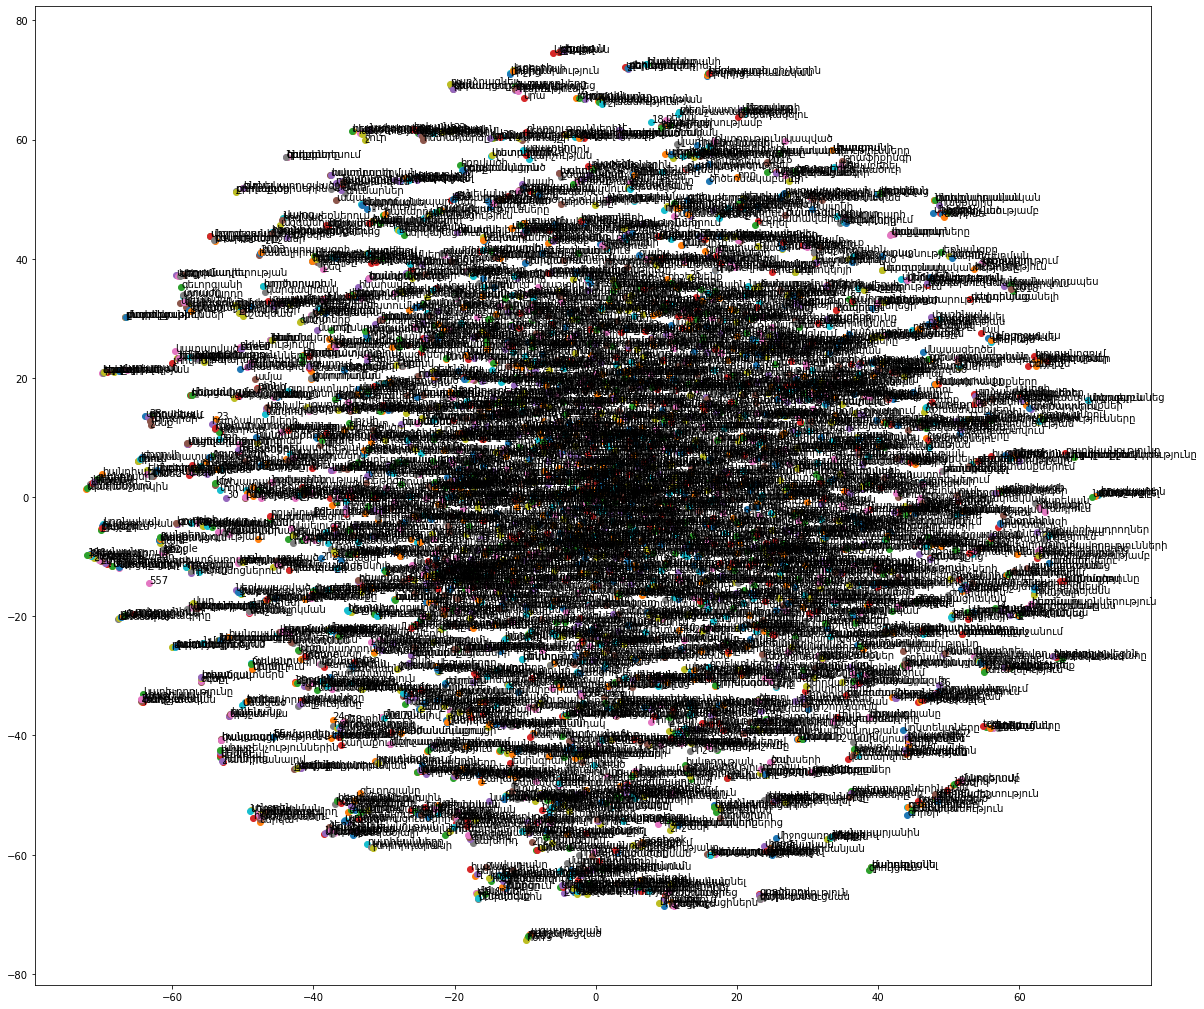

In [30]:
plt.figure(figsize=(20,18))

for i, word in enumerate(tokenizer.word_index):
    x, y = embeddings_2d[i, 0], embeddings_2d[i, 1]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=10)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(data)

In [32]:
embeddings_2d.shape

(4139, 2)